# Flight operations overview #

On this Notebook I will try to get some conclusions regarding to the flights operation using the dataset provided.

*Note: This is my first analysis ever. I would really appreciate any suggestion or comment that could help me improve the code/analysis quality. Thanks in advance!*

## Setting up ##

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

## Loading dataframes ##

In [3]:
airlines = pd.read_csv('../airlines.csv')
airports = pd.read_csv('../airports.csv')
flights = pd.read_csv('../flights.csv', low_memory=False)

##Exploring Data frames ##

### Airlines ###

In [4]:
airlines.head(2)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.


The airlines dataframe provides us the IATA code for each airline. We can use this data to create a dictionary to use it later.

In [5]:
airlines_dict = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
airlines_dict

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

###Airports ###

In [6]:
airports.head(2)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.6819


In [7]:
airports.shape[0] # Number of airports

322

The airports data frame provides geographical information of 322 airport associated to its IATA code.

### Flights ###

In [8]:
flights.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
rows,cols = flights.shape
print("Number of rows: ", rows)
print("Number of columns: ", cols)

Number of rows:  5819079
Number of columns:  31


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

## Adding some useful columns ##

 1. I add a column with the date in datetime format to make easier plotting the data.
 2. I add a columns with the month name
 3. I add a column with the day of the week name
 4. I add a column with the name of the airline that operates each flight

In [11]:
# 1. Date
flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH','DAY']], yearfirst=True)

# 2. Month name
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
flights['MONTH_desc'] = flights['MONTH'].apply(lambda m: month_dict[m])

# 3. Day of the week name
dow_dict = {
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
    7: 'Monday'
}
flights['DOW_desc'] = flights['DAY_OF_WEEK'].apply(lambda d: dow_dict[d])

# 4. Airline name
flights['AIRLINE_desc'] = flights['AIRLINE'].apply(lambda a: airlines_dict[a])
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,MONTH_desc,DOW_desc,AIRLINE_desc
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,01- January,Friday,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,01- January,Friday,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,01- January,Friday,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,01- January,Friday,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,01- January,Friday,Alaska Airlines Inc.


In [12]:
Seems like there were no errrors. Time to clean some data.

SyntaxError: invalid syntax (<ipython-input-12-40edfb4e5843>, line 1)

## Cleaning ##

Let's clean the dataframe to get the columns we will use for the analysis.
By now, I will not need the reasons for cancellations or delays.

In [13]:
flights.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1, inplace=True)

For this analysis I don't need the Tail number nor the flight number

In [14]:
flights.drop(['FLIGHT_NUMBER','TAIL_NUMBER'], axis=1, inplace=True)

In [15]:
flights.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE,MONTH_desc,DOW_desc,AIRLINE_desc
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,4.0,430,408.0,-22.0,0,0,2015-01-01,01- January,Friday,Alaska Airlines Inc.
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,4.0,750,741.0,-9.0,0,0,2015-01-01,01- January,Friday,American Airlines Inc.


I still haven't decided if I will explore details about time, distances and locations. I'm not dropping more columns by now.

## Flights Operation ##
First of all, I want to get a first idea of the scheduled flights on 2015 and how many of them were cancelled.

In [16]:
cancelled = flights[flights['CANCELLED'] == 1].count()['CANCELLED']
scheduled = flights.count()['SCHEDULED_DEPARTURE']
operated = scheduled - cancelled
ratio_oper = operated / scheduled * 100
ratio_cancel = 100 - ratio_oper

print("Scheduled flights: ", scheduled)
print("Cancelled flights: ", cancelled)
print("Operated flights: ", operated)
print("\n")
print("Ratio operated flights over scheduled flights: %s" % ratio_oper)
print("Ratio operated flights over scheduled flights: %s" % ratio_cancel)

Scheduled flights:  5819079
Cancelled flights:  89884
Operated flights:  5729195


Ratio operated flights over scheduled flights: 98.4553569388
Ratio operated flights over scheduled flights: 1.54464306121


98.45% of scheduled flights were operated.
Let's plot it!

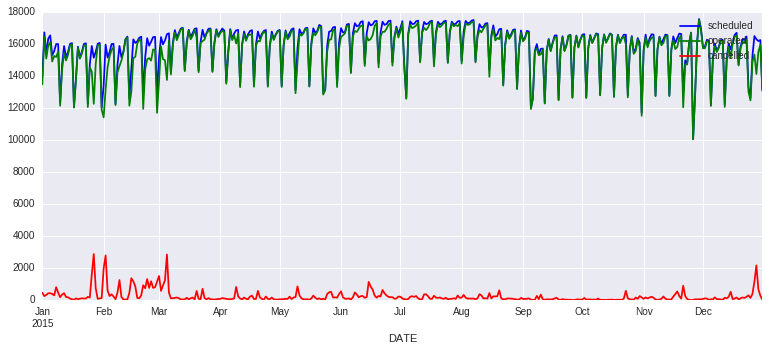

In [18]:
fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

flights.groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='b', label="scheduled");
flights[flights['CANCELLED'] == 0].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='g', label="operated");
flights[flights['CANCELLED'] == 1].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='r', label="cancelled");

ax.legend();

From the plot we can observe that:

 1. Total scheduled flights varies depending on the season. There are more flights on Summer months 
 and we can deduce a little increment of flights during Christmas hollidays.
 2. On the first half of September there's a remarkable decrease of scheduled flights. Maybe because of the 9/11 psychologic impact? 
 3. In the end of January and in the begining of February there were a lot of cancellations. During all february there are a large amount of cancelled flights periodically. I firstly tought those cancellations could be caused by bad weather, but it's (almost) constant periodicity make me think about a possibility of Air controllers strike. I will search it later.

What if I group the scheduled flights by airlines?

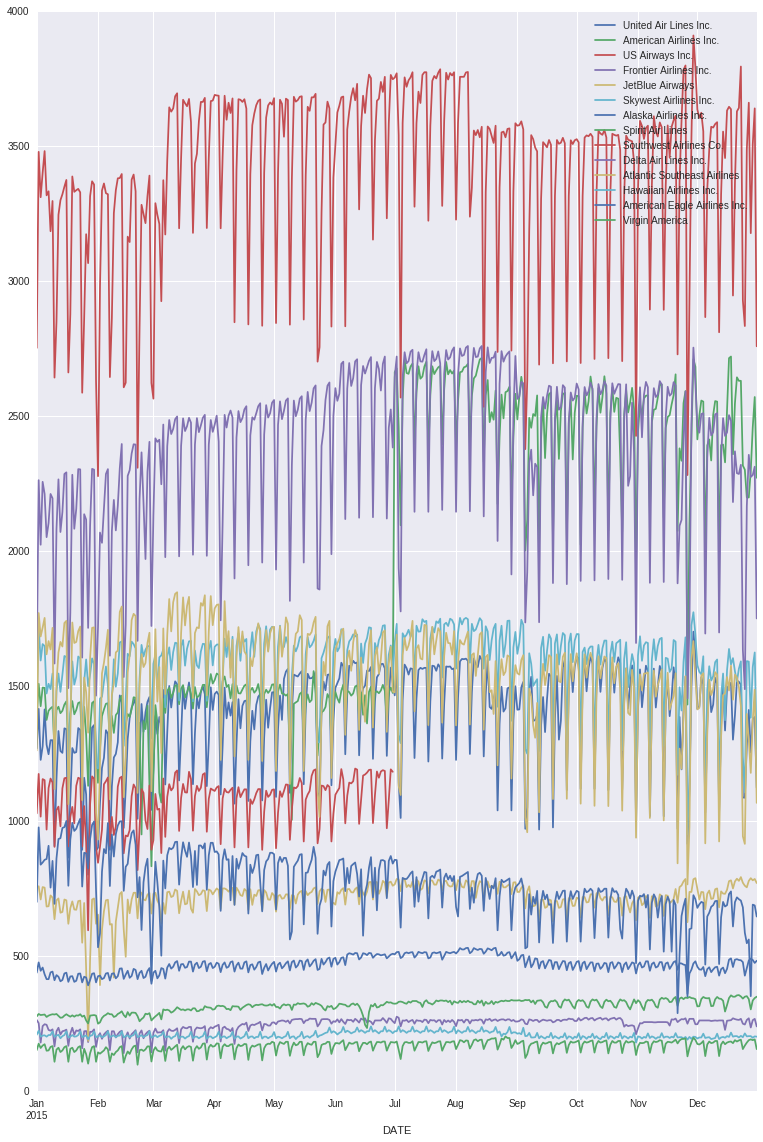

In [19]:
fig = plt.figure(figsize=(10,15))

ax = fig.add_axes([0,0,1,1])

for airline in airlines['AIRLINE']:
    flights[(flights['AIRLINE_desc'] == airline) & (flights['CANCELLED'] == 0) ].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(x='DATE', label=airline)

ax.legend();

Mmmh... Too difficult to read... Let's try a heat map.

First, I need to create a matrix to visualize it. I create one with airlines on columns, months on rows and the total of scheduled flights as a value.

In [20]:
pvt_scheduled_airline_date = flights.pivot_table(index="MONTH_desc",columns="AIRLINE_desc",values="SCHEDULED_DEPARTURE",aggfunc=lambda x: x.count())
pvt_scheduled_airline_date.head()

AIRLINE_desc,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
MONTH_desc,,,,,,,,,,,,,,
01- January,13257.0,44059.0,29900.0,49925.0,64421.0,6829.0,6440.0,21623.0,48114.0,100042.0,8743.0,33489.0,38395.0,4731.0
02- February,12194.0,39835.0,26940.0,45138.0,60884.0,5809.0,5779.0,19751.0,43989.0,90172.0,8089.0,30153.0,36235.0,4223.0
03- March,14276.0,45966.0,28146.0,54190.0,74166.0,6950.0,6313.0,22590.0,50078.0,109245.0,9400.0,34516.0,43603.0,4873.0
04- April,13974.0,44770.0,25695.0,49296.0,72170.0,7148.0,6093.0,22020.0,49329.0,106407.0,9496.0,32496.0,41342.0,4915.0
05- May,14682.0,44710.0,25431.0,49213.0,74815.0,8118.0,6434.0,22565.0,49864.0,107702.0,10051.0,33761.0,44411.0,5236.0


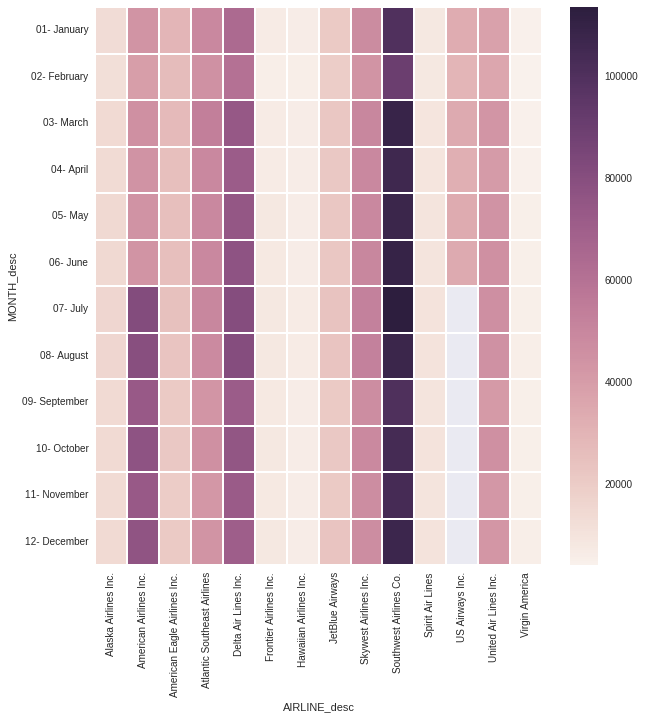

In [21]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(pvt_scheduled_airline_date, linecolor="w", linewidths=1);

Now it's easier to get an idea about the volume of operated flights by each company.

Notice that from July, US Airways Inc haven't scheduled any flight, while from the same data American Airlines has increased its flights. That suggests me that American Airlines merged and they are operating as American Airlines Inc.

We can also see that Southwest Airlines Co. schedules much more flights than other companies. It could be because it has a very large fleet, it operates low range flights or both. Both are indicators of a Low Cost company strategy, I think Southwest Airlines is a low-cost operator, I will look for it later.

As we can see in the heatmap and the previous plot, Southwest Airlines is the largest Airline in volume of flights. Until July, the second largest company was Delata Air Lines, but from July its flight operations number is quite similar to American Airlines, which reinforces my hipothesis of its merging with US Airways.

## Validating hipothesis ##

### American Airlines merger with US Airways ###

*"April 8, 2015: FAA granted American Airlines and US Airways the authority to operate
as a single carrier. The decision allowed the two airlines to combine work forces,
websites, and reservations systems, starting the fall of 2015. (See October 20, 2014;
October 16, 2015.)"* 

Source: [Federal Aviation Association 1997-2015 Chronology][1] 

  [1]: https://www.faa.gov/about/history/media/final_1997-2015_chronology.pdf

###February cancellations ###

After some Googling, I am sure that high ratio of flight cancellations occurred between January and February were due to extreme weather. There were at least 2 strong blizzards that caused a lot of flight cancellations.

According to CBS News, on January 26th there [were more than 6500 flight cancellations in 2 days because of extreme weather][1].

According to USA Today, on [February 16th there were more than 3000 flights cancelled because of a blizzard][2].


  [1]: http://www.cbsnews.com/news/blizzard-2015-flight-delays-and-cancellations-pile-up/
  [2]: http://www.usatoday.com/story/todayinthesky/2015/02/16/flight-cancellations-at-600-and-counting-from-new-storm/23488003/